Act 2. Color segmentation

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2 as cv


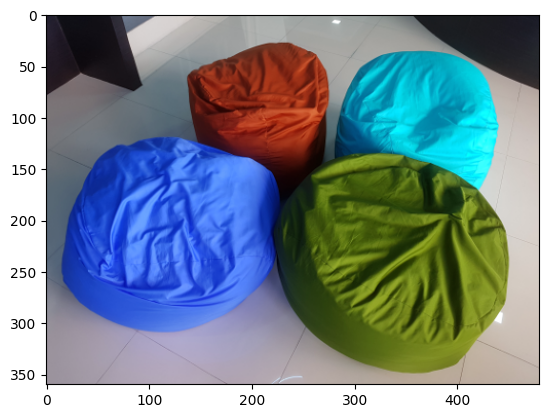

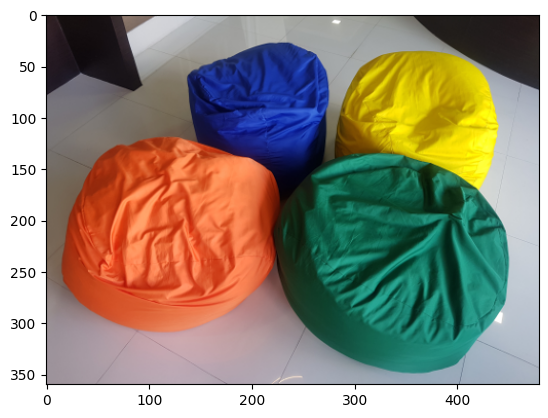

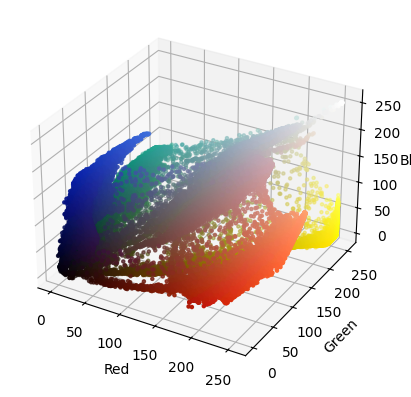

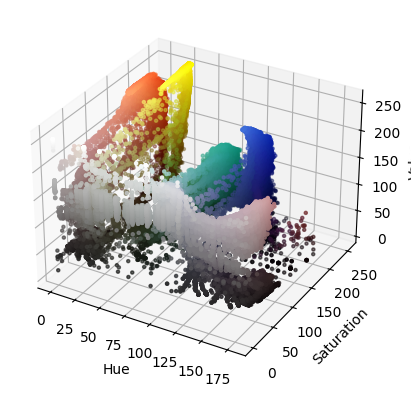

In [8]:
img = cv.imread("bags.png") 
plt.imshow(img)
plt.show()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection = "3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors = pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()
hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
h,s,v = cv.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")
axis.scatter(h.flatten(),s.flatten(),v.flatten(), facecolors = pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()



BAG VERDE


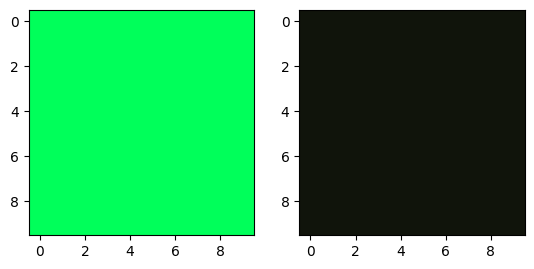

In [9]:
light_green= ( 100,255, 255)
dark_green = (62,110,20)


from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10,10,3), light_green,dtype=np.uint8)/255.0
do_square = np.full((10,10,3), dark_green, dtype=np.uint8)/255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

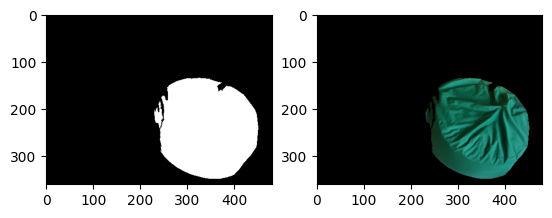

In [10]:
mask = cv.inRange(hsv_img,dark_green,light_green)
result = cv.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

BAG AMARILLA

In [ ]:
light_yellow = (40,255,255)
dark_yellow = (25,130,120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10,10,3), light_yellow,dtype=np.uint8)/255.0
do_square = np.full((10,10,3), dark_yellow, dtype=np.uint8)/255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

In [ ]:
mask = cv.inRange(hsv_img,dark_yellow,light_yellow)
result = cv.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()